<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/public_Health/Basemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
from PIL import Image
import pandas as pd
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, DataLoader, Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import torchvision.transforms as transforms

In [ ]:
test_folder = glob.glob(r'D:\Stuff\VScode\Workspace\Notebooks\DH_Project\Project\aptos2019-blindness-detection\test_images\*.png')
train_folder = glob.glob(r'D:\Stuff\VScode\Workspace\Notebooks\DH_Project\Project\aptos2019-blindness-detection\train_images\*.png')

# image to a Torch tensor
itot = transforms.Compose([
    # transforms.PILToTensor(),
    transforms.Resize(256), # resize the input to 256x256
    transforms.CenterCrop(224), # crop a 224x224 region from the center
    transforms.ToTensor(), # convert the input to a torch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # normalize the pixel values using ImageNet stats
                         std=[0.229, 0.224, 0.225])
])

image_list = []

for filename in train_folder[1:10]:
    image_list.append(filename)

In [ ]:
# Test was useless as it didn't had labels to work with
# df_test = pd.read_csv(r'D:\Stuff\VScode\Workspace\Notebooks\DH_Project\Project\aptos2019-blindness-detection\test.csv')
df_train = pd.read_csv(r'D:\Stuff\VScode\Workspace\Notebooks\DH_Project\Project\aptos2019-blindness-detection\train.csv')


num_classes = 5
classes = [
    'No DR',
    'Mild',
    'Moderate',
    'Severe',
    'Proliferative DR'
]
df_train.head(10)
# 0 - No DR
#
# 1 - Mild
#
# 2 - Moderate
#
# 3 - Severe
#
# 4 - Proliferative DR

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
5  0083ee8054ee          4
6  0097f532ac9f          0
7  00a8624548a9          2
8  00b74780d31d          2
9  00cb6555d108          1

In [ ]:
def loadImage(path):
    return Image.open(path)

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, data, transforms, image_path):
        self.image_paths = image_path
        self.labels = data[1]
        self.transforms = transforms
        self.data=data[0]

    def __len__(self):
        return len(self.data[0])

    def __getitem__(self, idx):
        image = self.transforms(loadImage(self.image_paths[idx]))
        target = F.one_hot(torch.tensor(y), num_classes=5)
        return [image, target]

In [ ]:
# # Checking out the transform and how it works

# image_list = torch.tensor(itot(Image.open(train_folder[0])))
# z = itot(Image.open(train_folder[1]))

# image_list = torch.cat((image_list, z), 0)
# len(image_list)

In [ ]:
print(f'The number of images in train folder are {len(train_folder)}')

The number of images in train folder are 3662


In [ ]:
# df_train.iloc[:, 0][0] + '.png'
df_train.iloc[:, 0][:10]

0    000c1434d8d7
1    001639a390f0
2    0024cdab0c1e
3    002c21358ce6
4    005b95c28852
5    0083ee8054ee
6    0097f532ac9f
7    00a8624548a9
8    00b74780d31d
9    00cb6555d108
Name: id_code, dtype: object

Seeing how the function works (remove it after we are done with this code)

In [ ]:
# splitting the test folder into val and test split
n1 = int(len(train_folder)*0.8)
n2 = int(len(train_folder)*0.9)
val_list = test_folder[n1:n2]
test_list = test_folder[n2:]

lim = 10

data1 = (df_train.iloc[:lim, 0], [df_train.iloc[i, 1] for i in range(lim)])
data2 = (df_train.iloc[n1:lim, 0], [df_train.iloc[(n1+i), 1] for i in range(lim)])
data2 = (df_train.iloc[n2:(n2+lim), 0], [df_train.iloc[n2:(n2+i), 1] for i in range(lim)])

In [ ]:
train_folder[:lim]

['D:\\Stuff\\VScode\\Workspace\\Notebooks\\DH_Project\\Project\\aptos2019-blindness-detection\\train_images\\000c1434d8d7.png',
 'D:\\Stuff\\VScode\\Workspace\\Notebooks\\DH_Project\\Project\\aptos2019-blindness-detection\\train_images\\001639a390f0.png',
 'D:\\Stuff\\VScode\\Workspace\\Notebooks\\DH_Project\\Project\\aptos2019-blindness-detection\\train_images\\0024cdab0c1e.png',
 'D:\\Stuff\\VScode\\Workspace\\Notebooks\\DH_Project\\Project\\aptos2019-blindness-detection\\train_images\\002c21358ce6.png',
 'D:\\Stuff\\VScode\\Workspace\\Notebooks\\DH_Project\\Project\\aptos2019-blindness-detection\\train_images\\005b95c28852.png',
 'D:\\Stuff\\VScode\\Workspace\\Notebooks\\DH_Project\\Project\\aptos2019-blindness-detection\\train_images\\0083ee8054ee.png',
 'D:\\Stuff\\VScode\\Workspace\\Notebooks\\DH_Project\\Project\\aptos2019-blindness-detection\\train_images\\0097f532ac9f.png',
 'D:\\Stuff\\VScode\\Workspace\\Notebooks\\DH_Project\\Project\\aptos2019-blindness-detection\\train_ima

In [ ]:
train_dataset = ImageDataset(data1, itot, train_folder[:lim])

Val_dataset = ImageDataset(data2, transforms.Compose([
    # transforms.PILToTensor(),
    transforms.Resize(256), # resize the input to 256x256
    transforms.CenterCrop(224), # crop a 224x224 region from the center
    transforms.ToTensor(), # convert the input to a torch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # normalize the pixel values using ImageNet stats
                         std=[0.229, 0.224, 0.225])
]), val_list[:lim])

test_dataset = ImageDataset(data3, transforms.Compose([
    # transforms.PILToTensor(),
    transforms.Resize(256), # resize the input to 256x256
    transforms.CenterCrop(224), # crop a 224x224 region from the center
    transforms.ToTensor(), # convert the input to a torch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # normalize the pixel values using ImageNet stats
                         std=[0.229, 0.224, 0.225])
]), test_list[:lim])

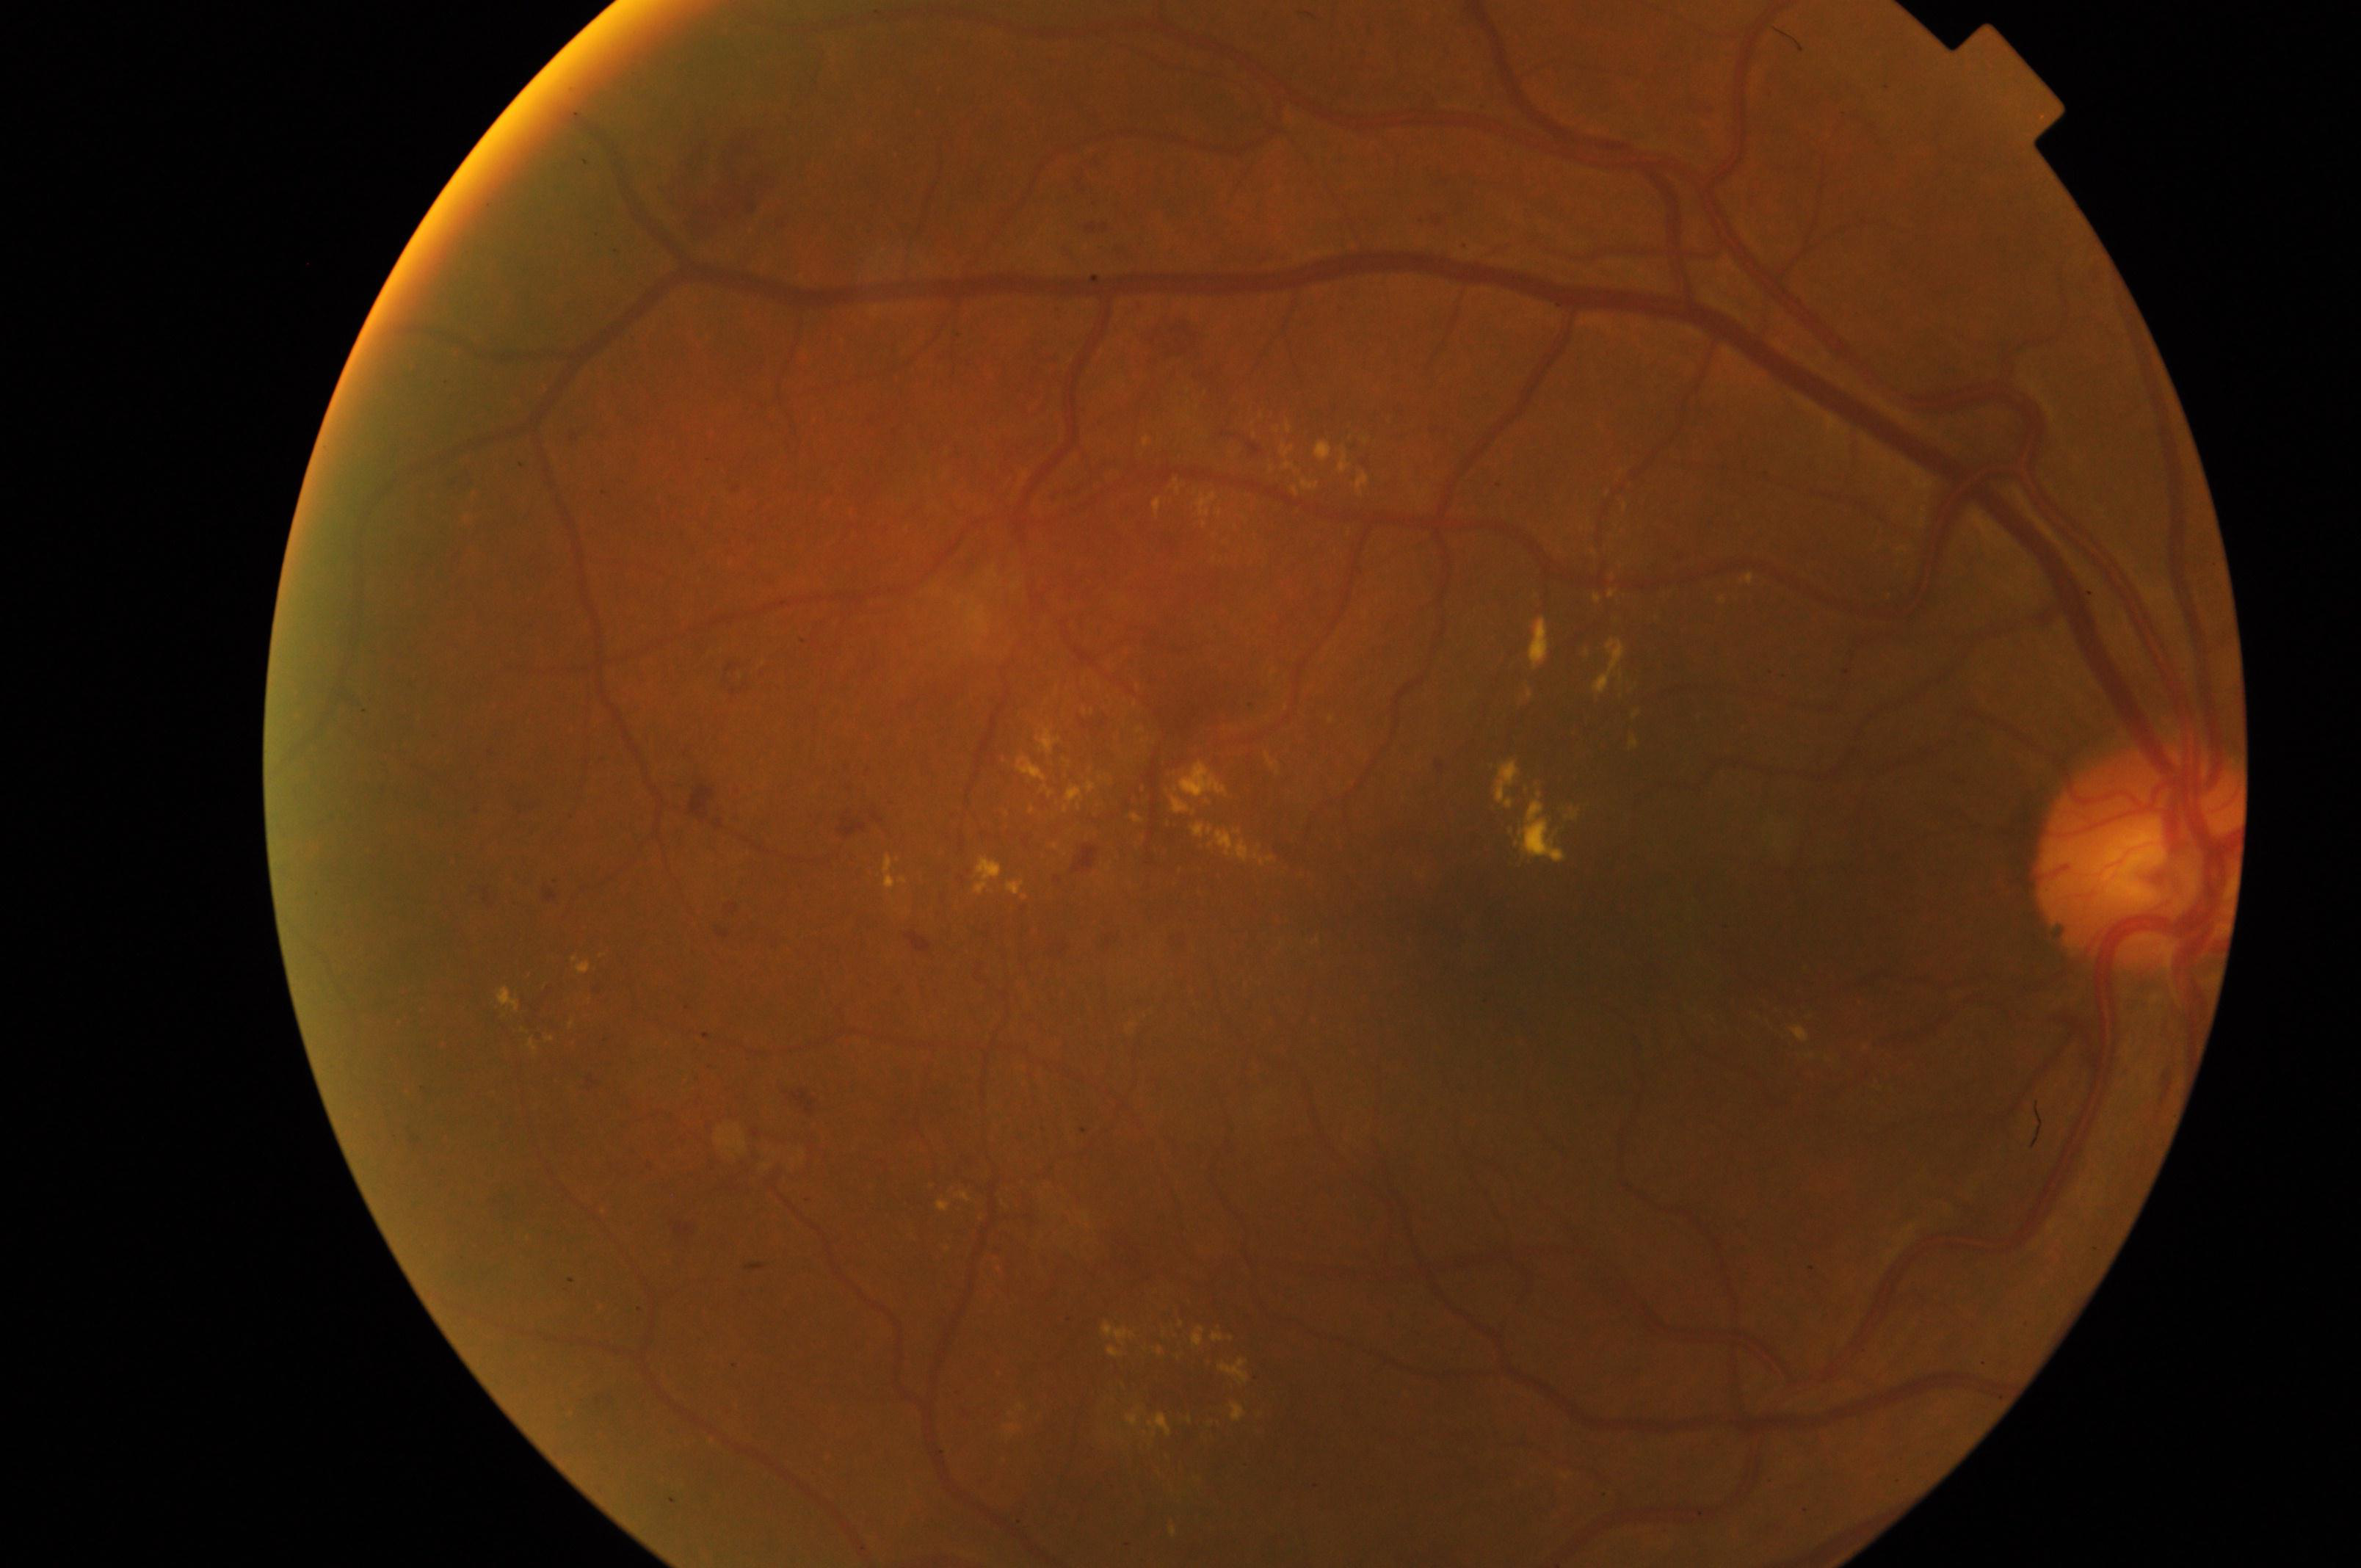

In [ ]:
display(Image.open(train_folder[0]))

In [ ]:
resnet18 = torchvision.models.resnet18(pretrained=True)

for param in resnet18.parameters():
    # We can turn these to true when training the model in the GPUs
    param.requires_grad = False

# the total number of input features for the final layer
n_inputs = resnet18.fc.in_features

# Defining a MLP classifier
mlp = nn.Sequential(nn.Linear(n_inputs, 256), # First input layer

                    nn.ReLU(), # Activation function

                    nn.Dropout(0.2), # Dropout for regularization

                    nn.Linear(256, 128), # Second hidden layer

                    nn.ReLU(), # Activation function

                    nn.Dropout(0.2), # Dropout for regularization

                    nn.Linear(128, num_classes), # Output layer

                    nn.LogSoftmax(dim=1) # log softmax for multi-classes classification
                    )

# Now we want to replace the final layer of resnet to this multi layer perceptron (MLP)

resnet18.fc = mlp

model = resnet18

c:\Users\tsule\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tsule\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.fit(Xtr, Ytr)

Old code \\/

In [ ]:
# # Import resnet18 from torchvision
# from torchvision.models import resnet18
# import torch
# # Load the pretrained model
# model = resnet18(pretrained=True)

# # Remove the last layer (fc) to get the features
# model = torch.nn.Sequential(*list(model.children())[:-1])

# num_layers=len(list(model.children()))

# # Unfreezing the layers
# for i in range(num_layers):
#   layer = list(model.children())
#   for param in layer.parameters():
#     param.requires_grad = True
# # Loop over the images in the list and extract features
# features = []
# for image in image_list:
#   # Preprocess the image as needed
#   # ...
#   # Pass the image through the model
#   output = model(image)
#   # Append the features to the list
#   features.append(output)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # creating an instance of the classifier
# rf = RandomForestClassifier()
